In [41]:
#Libraries
import math
from datetime import date
import datetime
from datetime import timedelta
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
today = date.today()
tomorrow = today + datetime.timedelta(days = 1)
print('Enter the YAHOO Finance Symbol:')
#companyname = str(input())
print(tomorrow)

Enter the YAHOO Finance Symbol:
2020-06-27


In [37]:
df = web.DataReader(companyname, data_source='yahoo', start='2012-01-01', end=today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-22,359.459991,351.149994,351.339996,358.869995,33861300.0,358.869995
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999
2020-06-24,368.790009,358.519989,365.000000,360.059998,48155800.0,360.059998


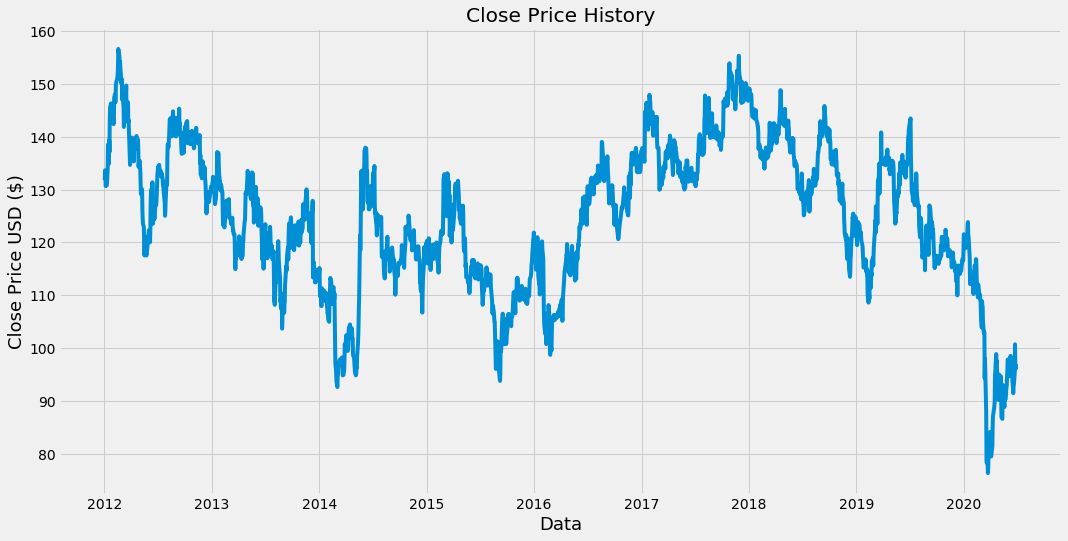

In [19]:
#Visualizing the data(Close Price)
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
fig1 = plt.gcf()
plt.show()
fig1.savefig('graphs/close_graph_plot.png')  

In [20]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1668

In [21]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.6908199 ],
       [0.71368002],
       [0.71159719],
       ...,
       [0.25753593],
       [0.24568798],
       [0.25691232]])

In [22]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.6908199 , 0.71368002, 0.71159719, 0.67678949, 0.67834843,
       0.67834843, 0.68926097, 0.70692039, 0.71888071, 0.77447845,
       0.72926936, 0.78486709, 0.75680628, 0.82904114, 0.86074372,
       0.87165626, 0.86957343, 0.86333769, 0.85606692, 0.83215901,
       0.83683581, 0.82280541, 0.83371794, 0.88463888, 0.89348134,
       0.87372634, 0.88931568, 0.91790039, 0.92154215, 0.92828903,
       0.93504866, 0.93972546, 0.95895657, 1.        , 0.98181669,
       0.94699624, 0.97038025, 0.95634984, 0.9267301 , 0.91842428,
       0.92881293, 0.88100986, 0.90751174, 0.8726913 , 0.86125486,
       0.81604577, 0.85190126, 0.83580077, 0.84774835, 0.89295744,
       0.91374748, 0.83839475, 0.83424184, 0.84671331, 0.87425023,
       0.82695831, 0.83268291, 0.76668378, 0.75161833, 0.72667539])]
[0.736028990237156]

[array([0.6908199 , 0.71368002, 0.71159719, 0.67678949, 0.67834843,
       0.67834843, 0.68926097, 0.70692039, 0.71888071, 0.77447845,
       0.72926936, 0.78486709, 0.7568

In [23]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1608, 60, 1)

In [25]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
#Training the Model
model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1608/1608 [==============================] - 35s 22ms/step - loss: 0.0038


In [28]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [29]:
x_test = np.array(x_test)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
#Get Model's predicted Values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [32]:
#RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.63205018260782

C:\Users\ashis dev\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


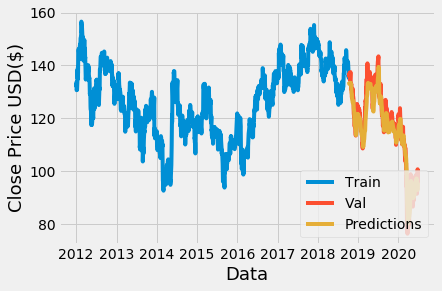

In [33]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [34]:
#Get the quote
company_quote = web.DataReader(companyname, data_source='yahoo', start='2012-01-01', end=today)
#Create a new Dataframe
new_df = company_quote.filter(['Close'])
#Get the Last 60 days Closing Prices and convert the dataframe into an array
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted Scaled Price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[96.13716]]
